In [1]:
# Load the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import re
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("portugal_ml.csv")

In [3]:
df.tail()

,Year_Quarter,Number_of_employees,male,female,Clerical_support_workers,Skill_levels_high,Skill_level_medium,Skill_level_low
483,2011Q1,545.1,0,1,0.0,1.0,0.0,0.0
484,2011Q1,918.8,0,1,0.0,0.0,1.0,0.0
485,2011Q1,395.0,0,1,0.0,0.0,0.0,1.0
486,2011Q1,145.3,1,0,1.0,0.0,0.0,0.0
487,2011Q1,259.9,0,1,1.0,0.0,0.0,0.0


In [84]:
df["Number_of_employees"] = df["Number_of_employees"].astype('int')
df["Clerical_support_workers"] = df["Clerical_support_workers"].astype('int')
df["Skill_levels_high"] = df["Skill_levels_high"].astype('int')
df["Skill_level_medium"] = df["Skill_level_medium"].astype('int')
df["Skill_level_low"] = df["Skill_level_low"].astype('int')

In [85]:
df.head()

,Year_Quarter,Number_of_employees,male,female,Clerical_support_workers,Skill_levels_high,Skill_level_medium,Skill_level_low
0,2020Q4,185,1,0,0,0,0,0
1,2020Q4,23,0,1,0,0,0,0
2,2020Q3,203,1,0,0,0,0,0
3,2020Q3,23,0,1,0,0,0,0
4,2020Q2,206,1,0,0,0,0,0


In [86]:
from numpy import mean

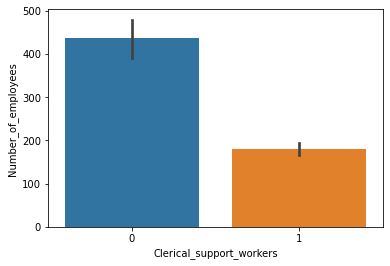

In [87]:
x= sns.barplot(x="Clerical_support_workers", y="Number_of_employees", data=df, estimator=mean, ci=99); ## confidence intervels

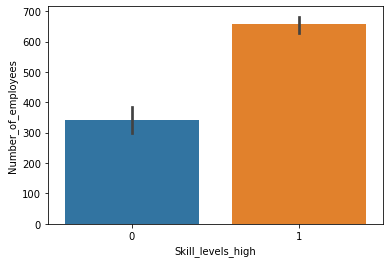

In [88]:
x= sns.barplot(x="Skill_levels_high", y="Number_of_employees", data=df, estimator=mean, ci=99); ## confidence intervels

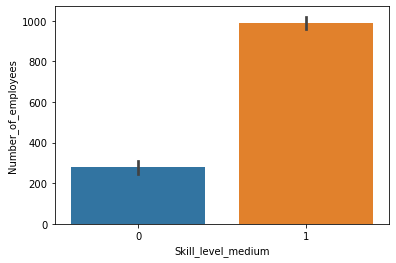

In [89]:
x= sns.barplot(x="Skill_level_medium", y="Number_of_employees", data=df, estimator=mean, ci=99); ## confidence intervels

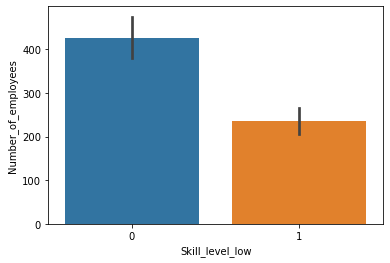

In [90]:
x= sns.barplot(x="Skill_level_low", y="Number_of_employees", data=df, estimator=mean, ci=99); ## confidence intervels

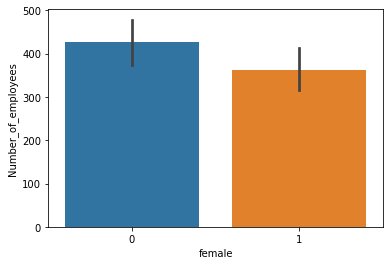

In [91]:
x= sns.barplot(x="female", y="Number_of_employees", data=df, estimator=mean, ci=99); ## confidence intervels

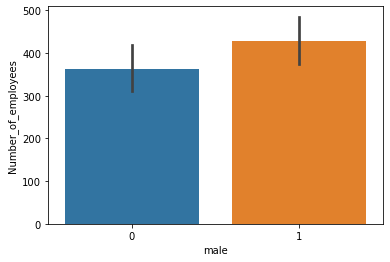

In [92]:
x= sns.barplot(x="male", y="Number_of_employees", data=df, estimator=mean, ci=99); ## confidence intervels

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Year_Quarter              488 non-null    object
 1   Number_of_employees       488 non-null    int32 
 2   male                      488 non-null    int64 
 3   female                    488 non-null    int64 
 4   Clerical_support_workers  488 non-null    int32 
 5   Skill_levels_high         488 non-null    int32 
 6   Skill_level_medium        488 non-null    int32 
 7   Skill_level_low           488 non-null    int32 
dtypes: int32(5), int64(2), object(1)
memory usage: 21.1+ KB


In [94]:
import plotly.express as px

In [95]:
xmin,xmax = min(df.Number_of_employees), max(df.Number_of_employees)
ymin,ymax = min(df.Year_Quarter), max(df.Year_Quarter)

In [96]:
ymin,ymax

('2000Q1', '2020Q4')

In [97]:
fig = px.scatter(df,
                x='Number_of_employees',
                y='Year_Quarter',
                animation_group='Year_Quarter', 
                color='Number_of_employees', hover_name='Number_of_employees',
                width=1000, height=1000,
                log_x=False, size_max=15,
                range_x=[xmin,xmax], range_y=[ymin,ymax])
fig.show()

##  logistic regression

In [98]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [99]:
df.head()

,Year_Quarter,Number_of_employees,male,female,Clerical_support_workers,Skill_levels_high,Skill_level_medium,Skill_level_low
0,2020Q4,185,1,0,0,0,0,0
1,2020Q4,23,0,1,0,0,0,0
2,2020Q3,203,1,0,0,0,0,0
3,2020Q3,23,0,1,0,0,0,0
4,2020Q2,206,1,0,0,0,0,0


In [100]:
df.shape

(488, 8)

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
X = df.drop(['Year_Quarter', 'male', 'female'], axis=1)
y = df['male']

In [103]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [104]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# Fit logistic regression model to training data
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [106]:
y_pred=log_reg.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [107]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5510204081632653
[[25 23]
 [21 29]]
              precision    recall  f1-score   support

           0       0.54      0.52      0.53        48
           1       0.56      0.58      0.57        50

    accuracy                           0.55        98
   macro avg       0.55      0.55      0.55        98
weighted avg       0.55      0.55      0.55        98



##Interpretation:

The confusion matrix shows that there were 25 true negatives (TN), 23 false positives (FP), 21 false negatives (FN), and 29 true positives (TP). This means that the model correctly predicted 54 out of 98 (60%) cases.

The classification report shows that the precision for the 0 class (male) is 0.54 and for the 1 class (female) is 0.56. The recall for the 0 class is 0.52 and for the 1 class is 0.58. The f1-score for the 0 class is 0.53 and for the 1 class is 0.57. These scores indicate that the model performs slightly better at predicting male earnings than female earnings.

accuracy is 0.55.

## Clustering- K-Nearest Neighbors

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
X = df.drop(['Year_Quarter', 'male', 'female'], axis=1)
y = df['male']

In [110]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [111]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
model = KNeighborsClassifier(n_neighbors=5)

In [113]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [114]:
# Predict cluster labels for new data
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [115]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9489795918367347


## Decission Tree Classifier

In [116]:
df.head()

,Year_Quarter,Number_of_employees,male,female,Clerical_support_workers,Skill_levels_high,Skill_level_medium,Skill_level_low
0,2020Q4,185,1,0,0,0,0,0
1,2020Q4,23,0,1,0,0,0,0
2,2020Q3,203,1,0,0,0,0,0
3,2020Q3,23,0,1,0,0,0,0
4,2020Q2,206,1,0,0,0,0,0


In [117]:
X = df.drop(['Year_Quarter','Clerical_support_workers'], axis=1)
y = df['Clerical_support_workers']

In [118]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [119]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [122]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9897959183673469


## Random Forests

In [123]:
df.tail()

,Year_Quarter,Number_of_employees,male,female,Clerical_support_workers,Skill_levels_high,Skill_level_medium,Skill_level_low
483,2011Q1,545,0,1,0,1,0,0
484,2011Q1,918,0,1,0,0,1,0
485,2011Q1,395,0,1,0,0,0,1
486,2011Q1,145,1,0,1,0,0,0
487,2011Q1,259,0,1,1,0,0,0


In [124]:
X = df.drop(['Year_Quarter','Skill_level_medium'], axis=1)
y = df['Skill_level_medium']

In [125]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [126]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [129]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  1.0


## Non Linear SVM

In [130]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [131]:
df.head()

,Year_Quarter,Number_of_employees,male,female,Clerical_support_workers,Skill_levels_high,Skill_level_medium,Skill_level_low
0,2020Q4,185,1,0,0,0,0,0
1,2020Q4,23,0,1,0,0,0,0
2,2020Q3,203,1,0,0,0,0,0
3,2020Q3,23,0,1,0,0,0,0
4,2020Q2,206,1,0,0,0,0,0


In [132]:
df1=df[["Year_Quarter","Number_of_employees","male","female","Clerical_support_workers"]]

In [133]:
df1.tail()

,Year_Quarter,Number_of_employees,male,female,Clerical_support_workers
483,2011Q1,545,0,1,0
484,2011Q1,918,0,1,0
485,2011Q1,395,0,1,0
486,2011Q1,145,1,0,1
487,2011Q1,259,0,1,1


In [134]:
df1['Year_Quarter'] = pd.to_datetime(df1['Year_Quarter'])
df1.set_index('Year_Quarter', inplace=True)

In [135]:
X = df1.drop(['Number_of_employees'], axis=1)
y = df1['Number_of_employees']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [136]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.061224489795918366

Classification Report:
               precision    recall  f1-score   support

          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.13      1.00      0.23         5
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
         111       0.00      0.00      0.00         1
         118       0.00      0.00      0.00         3
         123       0.00      0.00      0.00         1
         126       0.00      0.00      0.00         1
         129       0.00      0.00      0.00         1
         131       0.00      0.00      0.00         1
         134       0.02  

In [137]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [138]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [0.01, 0.001, 0.0001],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 2,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)      

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ..................................C=1, gamma=0.0001; total time=   0.0s
[CV] END ..................................C=1, 

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [139]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.115300,0.007499,0.019140,0.000963,1,0.01,"{'C': 1, 'gamma': 0.01}",0.038462,0.038462,0.051282,0.051282,0.038462,0.043590,0.006281,7,0.044872,0.044872,0.041667,0.041667,0.044872,0.043590,0.001570
1,0.107718,0.002826,0.017360,0.000812,1,0.001,"{'C': 1, 'gamma': 0.001}",0.038462,0.038462,0.051282,0.051282,0.038462,0.043590,0.006281,7,0.044872,0.044872,0.041667,0.041667,0.044872,0.043590,0.001570
2,0.104142,0.004952,0.018151,0.000399,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.038462,0.038462,0.051282,0.051282,0.038462,0.043590,0.006281,7,0.044872,0.044872,0.041667,0.041667,0.044872,0.043590,0.001570
3,0.107911,0.006894,0.017952,0.000631,10,0.01,"{'C': 10, 'gamma': 0.01}",0.051282,0.064103,0.089744,0.051282,0.051282,0.061538,0.014951,1,0.064103,0.060897,0.054487,0.064103,0.064103,0.061538,0.003738
4,0.104926,0.006775,0.018151,0.001464,10,0.001,"{'C': 10, 'gamma': 0.001}",0.038462,0.038462,0.051282,0.051282,0.038462,0.043590,0.006281,7,0.044872,0.044872,0.041667,0.041667,0.044872,0.043590,0.001570
5,0.117080,0.009505,0.018961,0.000016,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.038462,0.038462,0.051282,0.051282,0.038462,0.043590,0.006281,7,0.044872,0.044872,0.041667,0.041667,0.044872,0.043590,0.001570
6,0.111297,0.006012,0.018749,0.000747,100,0.01,"{'C': 100, 'gamma': 0.01}",0.051282,0.051282,0.089744,0.051282,0.051282,0.058974,0.015385,4,0.073718,0.073718,0.064103,0.073718,0.073718,0.071795,0.003846
7,0.121276,0.007180,0.025725,0.005252,100,0.001,"{'C': 100, 'gamma': 0.001}",0.051282,0.064103,0.089744,0.051282,0.051282,0.061538,0.014951,1,0.064103,0.060897,0.054487,0.064103,0.064103,0.061538,0.003738
8,0.148000,0.028765,0.021738,0.003586,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.038462,0.038462,0.051282,0.051282,0.038462,0.043590,0.006281,7,0.044872,0.044872,0.041667,0.041667,0.044872,0.043590,0.001570
9,0.125670,0.023054,0.022135,0.007398,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.051282,0.051282,0.089744,0.051282,0.051282,0.058974,0.015385,4,0.073718,0.073718,0.064103,0.073718,0.073718,0.071795,0.003846


In [140]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.06153846153846153 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


## Implementing market basket analysis

In [141]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [143]:
df.head()

,Year_Quarter,Number_of_employees,male,female,Clerical_support_workers,Skill_levels_high,Skill_level_medium,Skill_level_low
0,2020Q4,185,1,0,0,0,0,0
1,2020Q4,23,0,1,0,0,0,0
2,2020Q3,203,1,0,0,0,0,0
3,2020Q3,23,0,1,0,0,0,0
4,2020Q2,206,1,0,0,0,0,0


In [144]:
df2=df[["male","female","Clerical_support_workers","Skill_levels_high","Skill_level_medium","Skill_level_low"]]

In [145]:
df2.head()

,male,female,Clerical_support_workers,Skill_levels_high,Skill_level_medium,Skill_level_low
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [146]:
#converting all positive vaues to 1 and everything else to 0
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

df2 = df2.applymap(my_encode_units)

In [147]:
#Generatig frequent itemsets
frequent_employee = apriori(df2, min_support=0.07, use_colnames=True)

C:\Users\Omprakash vootla\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [148]:
#generating rules
my_rules = association_rules(frequent_employee, metric="lift", min_threshold=1)

In [149]:
#viewing top 10 rules
my_rules.head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(male),(Clerical_support_workers),0.500000,0.163934,0.081967,0.163934,1.0,0.0,1.0,0.0
1,(Clerical_support_workers),(male),0.163934,0.500000,0.081967,0.500000,1.0,0.0,1.0,0.0
2,(Skill_levels_high),(male),0.163934,0.500000,0.081967,0.500000,1.0,0.0,1.0,0.0
3,(male),(Skill_levels_high),0.500000,0.163934,0.081967,0.163934,1.0,0.0,1.0,0.0
4,(Skill_level_medium),(male),0.163934,0.500000,0.081967,0.500000,1.0,0.0,1.0,0.0
5,(male),(Skill_level_medium),0.500000,0.163934,0.081967,0.163934,1.0,0.0,1.0,0.0
6,(Skill_level_low),(male),0.163934,0.500000,0.081967,0.500000,1.0,0.0,1.0,0.0
7,(male),(Skill_level_low),0.500000,0.163934,0.081967,0.163934,1.0,0.0,1.0,0.0
8,(female),(Clerical_support_workers),0.500000,0.163934,0.081967,0.163934,1.0,0.0,1.0,0.0
9,(Clerical_support_workers),(female),0.163934,0.500000,0.081967,0.500000,1.0,0.0,1.0,0.0


In [150]:
df2['Skill_level_low'].sum()

80

In [151]:
df2['female'].sum()

244

In [152]:
#Filtering rules based on condition
my_rules[ (my_rules['lift'] >= 1) &
       (my_rules['confidence'] >= 0.1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(male),(Clerical_support_workers),0.500000,0.163934,0.081967,0.163934,1.0,0.0,1.0,0.0
1,(Clerical_support_workers),(male),0.163934,0.500000,0.081967,0.500000,1.0,0.0,1.0,0.0
2,(Skill_levels_high),(male),0.163934,0.500000,0.081967,0.500000,1.0,0.0,1.0,0.0
3,(male),(Skill_levels_high),0.500000,0.163934,0.081967,0.163934,1.0,0.0,1.0,0.0
4,(Skill_level_medium),(male),0.163934,0.500000,0.081967,0.500000,1.0,0.0,1.0,0.0
5,(male),(Skill_level_medium),0.500000,0.163934,0.081967,0.163934,1.0,0.0,1.0,0.0
6,(Skill_level_low),(male),0.163934,0.500000,0.081967,0.500000,1.0,0.0,1.0,0.0
7,(male),(Skill_level_low),0.500000,0.163934,0.081967,0.163934,1.0,0.0,1.0,0.0
8,(female),(Clerical_support_workers),0.500000,0.163934,0.081967,0.163934,1.0,0.0,1.0,0.0
9,(Clerical_support_workers),(female),0.163934,0.500000,0.081967,0.500000,1.0,0.0,1.0,0.0


In [71]:
### https://colab.research.google.com/drive/1Khnu5HD3DjRGB4cTcdEmGE7cCUm73BsU#scrollTo=hvdOQKRIomfw
## https://www.youtube.com/watch?v=4QIWJVVWJdQ 

In [72]:
## Based on Market Basket analyis Clerical_support_workers male is more frequent employees and male skill level high and skill level low employees.